In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sold = pd.read_csv('ipl2022_sold.csv')
unsold = pd.read_csv('ipl2022_unsold.csv')

In [3]:
sold

,Players,Nationality,Type,Price Paid,Team
0,Robin Uthappa,Indian,Batsman,"₹2,00,00,000",CSK
1,Dwayne Bravo,Overseas,All-Rounder,"₹4,40,00,000",CSK
2,Ambati Rayudu,Indian,Wicket Keeper,"₹6,75,00,000",CSK
3,Deepak Chahar,Indian,Bowler,"₹14,00,00,000",CSK
4,C.Hari Nishaanth,Indian,Batsman,"₹20,00,000",CSK
...,...,...,...,...,...
199,Fazalhaq Farooqi,Overseas,Bowler,"₹50,00,000",SRH
200,Sean Abbott,Overseas,Bowler,"₹2,40,00,000",SRH
201,R Samarth,Indian,Batsman,"₹20,00,000",SRH
202,Shashank Singh,Indian,All-Rounder,"₹20,00,000",SRH


In [4]:
sold['Total Price'] = sold['Price Paid'].str.replace('₹', '')
sold['Total Price'] = sold['Total Price'].str.replace(',', '')
sold['Total Price'] = sold['Total Price'].astype(int)

In [5]:
sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Players      204 non-null    object
 1   Nationality  204 non-null    object
 2   Type         204 non-null    object
 3   Price Paid   204 non-null    object
 4   Team         204 non-null    object
 5   Total Price  204 non-null    int32 
dtypes: int32(1), object(5)
memory usage: 8.9+ KB


In [6]:
unsold

,PLAYER,NATIONALITYIndianOverseas,TYPEBatsmanAll-RounderBowlerWicket Keeper,"BASE PRICE₹2,00,00,000₹1,50,00,000₹1,00,00,000₹75,00,000₹50,00,000₹40,00,000₹30,00,000₹20,00,000"
0,Suresh Raina,Indian,Batsman,"₹2,00,00,000"
1,Steve Smith,Overseas,Batsman,"₹2,00,00,000"
2,Shakib Al Hasan,Overseas,All-Rounder,"₹2,00,00,000"
3,Adil Rashid,Overseas,Bowler,"₹2,00,00,000"
4,Imran Tahir,Overseas,Bowler,"₹2,00,00,000"
...,...,...,...,...
391,K Nitish Reddy,Indian,Batsman,"₹20,00,000"
392,Hardik Tamore,Indian,Wicket Keeper,"₹20,00,000"
393,Mihir Hirwani,Indian,Bowler,"₹20,00,000"
394,Sairaj Patil,Indian,All-Rounder,"₹20,00,000"


In [7]:
unsold = unsold.rename(columns = 
                         {
                             'PLAYER' : 'Players',
                             'NATIONALITYIndianOverseas' : 'Nationality',
                             'TYPEBatsmanAll-RounderBowlerWicket Keeper' : 'Type',
                             'BASE PRICE₹2,00,00,000₹1,50,00,000₹1,00,00,000₹75,00,000₹50,00,000₹40,00,000₹30,00,000₹20,00,000' : 'Base Price' 
                         }
             )

In [8]:
unsold =unsold.drop(columns = ['Base Price'])

In [9]:
unsold

,Players,Nationality,Type
0,Suresh Raina,Indian,Batsman
1,Steve Smith,Overseas,Batsman
2,Shakib Al Hasan,Overseas,All-Rounder
3,Adil Rashid,Overseas,Bowler
4,Imran Tahir,Overseas,Bowler
...,...,...,...
391,K Nitish Reddy,Indian,Batsman
392,Hardik Tamore,Indian,Wicket Keeper
393,Mihir Hirwani,Indian,Bowler
394,Sairaj Patil,Indian,All-Rounder


In [10]:
ipl = sold.append(unsold, ignore_index = True)

In [11]:
ipl

,Players,Nationality,Type,Price Paid,Team,Total Price
0,Robin Uthappa,Indian,Batsman,"₹2,00,00,000",CSK,20000000.0
1,Dwayne Bravo,Overseas,All-Rounder,"₹4,40,00,000",CSK,44000000.0
2,Ambati Rayudu,Indian,Wicket Keeper,"₹6,75,00,000",CSK,67500000.0
3,Deepak Chahar,Indian,Bowler,"₹14,00,00,000",CSK,140000000.0
4,C.Hari Nishaanth,Indian,Batsman,"₹20,00,000",CSK,2000000.0
...,...,...,...,...,...,...
595,K Nitish Reddy,Indian,Batsman,NaN,NaN,NaN
596,Hardik Tamore,Indian,Wicket Keeper,NaN,NaN,NaN
597,Mihir Hirwani,Indian,Bowler,NaN,NaN,NaN
598,Sairaj Patil,Indian,All-Rounder,NaN,NaN,NaN


In [12]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Players      600 non-null    object 
 1   Nationality  600 non-null    object 
 2   Type         600 non-null    object 
 3   Price Paid   204 non-null    object 
 4   Team         204 non-null    object 
 5   Total Price  204 non-null    float64
dtypes: float64(1), object(5)
memory usage: 28.2+ KB


In [13]:
ipl['Total Price'] = ipl['Total Price'].fillna(0)
ipl['Price Paid'] = ipl['Price Paid'].fillna('₹0')
ipl['Team'] = ipl['Team'].fillna('NO TEAM')
ipl

,Players,Nationality,Type,Price Paid,Team,Total Price
0,Robin Uthappa,Indian,Batsman,"₹2,00,00,000",CSK,20000000.0
1,Dwayne Bravo,Overseas,All-Rounder,"₹4,40,00,000",CSK,44000000.0
2,Ambati Rayudu,Indian,Wicket Keeper,"₹6,75,00,000",CSK,67500000.0
3,Deepak Chahar,Indian,Bowler,"₹14,00,00,000",CSK,140000000.0
4,C.Hari Nishaanth,Indian,Batsman,"₹20,00,000",CSK,2000000.0
...,...,...,...,...,...,...
595,K Nitish Reddy,Indian,Batsman,₹0,NO TEAM,0.0
596,Hardik Tamore,Indian,Wicket Keeper,₹0,NO TEAM,0.0
597,Mihir Hirwani,Indian,Bowler,₹0,NO TEAM,0.0
598,Sairaj Patil,Indian,All-Rounder,₹0,NO TEAM,0.0


In [14]:
def status(team):
    if team == 'NO TEAM':
        return 'UNSOLD'
    else:
        return 'SOLD'

In [15]:
ipl['Status'] = ipl['Team'].apply(status)
ipl

,Players,Nationality,Type,Price Paid,Team,Total Price,Status
0,Robin Uthappa,Indian,Batsman,"₹2,00,00,000",CSK,20000000.0,SOLD
1,Dwayne Bravo,Overseas,All-Rounder,"₹4,40,00,000",CSK,44000000.0,SOLD
2,Ambati Rayudu,Indian,Wicket Keeper,"₹6,75,00,000",CSK,67500000.0,SOLD
3,Deepak Chahar,Indian,Bowler,"₹14,00,00,000",CSK,140000000.0,SOLD
4,C.Hari Nishaanth,Indian,Batsman,"₹20,00,000",CSK,2000000.0,SOLD
...,...,...,...,...,...,...,...
595,K Nitish Reddy,Indian,Batsman,₹0,NO TEAM,0.0,UNSOLD
596,Hardik Tamore,Indian,Wicket Keeper,₹0,NO TEAM,0.0,UNSOLD
597,Mihir Hirwani,Indian,Bowler,₹0,NO TEAM,0.0,UNSOLD
598,Sairaj Patil,Indian,All-Rounder,₹0,NO TEAM,0.0,UNSOLD


In [16]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Players      600 non-null    object 
 1   Nationality  600 non-null    object 
 2   Type         600 non-null    object 
 3   Price Paid   600 non-null    object 
 4   Team         600 non-null    object 
 5   Total Price  600 non-null    float64
 6   Status       600 non-null    object 
dtypes: float64(1), object(6)
memory usage: 32.9+ KB


In [17]:
filt = ipl.duplicated(keep=False) == True

In [18]:
ipl.loc[filt]

,Players,Nationality,Type,Price Paid,Team,Total Price,Status
216,Amit Mishra,Indian,Bowler,₹0,NO TEAM,0.0,UNSOLD
478,Amit Mishra,Indian,Bowler,₹0,NO TEAM,0.0,UNSOLD
487,Shivam Sharma,Indian,All-Rounder,₹0,NO TEAM,0.0,UNSOLD
536,Shivam Sharma,Indian,All-Rounder,₹0,NO TEAM,0.0,UNSOLD


In [19]:
ipl.drop_duplicates(ignore_index=True, inplace=True)

In [20]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Players      598 non-null    object 
 1   Nationality  598 non-null    object 
 2   Type         598 non-null    object 
 3   Price Paid   598 non-null    object 
 4   Team         598 non-null    object 
 5   Total Price  598 non-null    float64
 6   Status       598 non-null    object 
dtypes: float64(1), object(6)
memory usage: 32.8+ KB


In [21]:
# Total no of players participated in auction

ipl['Players'].count()

598

In [22]:
# Types of players

types = ipl['Type'].value_counts()
types

All-Rounder      231
Bowler           205
Batsman          103
Wicket Keeper     59
Name: Type, dtype: int64

[]

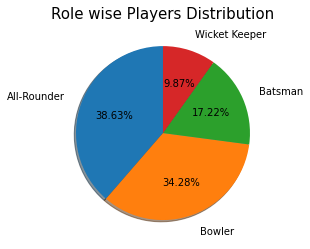

In [23]:
plt.pie(types.values, labels = types.index, labeldistance=1.2, autopct='%1.2f%%', shadow=True, startangle=90)
plt.title('Role wise Players Distribution', fontsize = 15)
plt.plot()

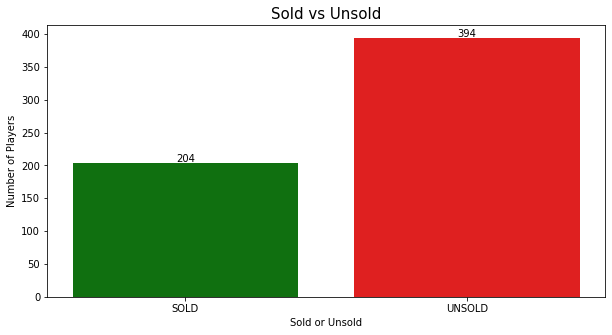

In [24]:
# Sold vs unsold Players comparison

plt.figure(figsize=(10,5))
fig = sns.countplot(ipl['Status'], palette=['Green', 'Red'])
plt.xlabel('Sold or Unsold')
plt.ylabel('Number of Players')
plt.title('Sold vs Unsold', fontsize = 15)
plt.plot()

# function to put label on top of bars

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0,4), textcoords = 'offset points')

In [25]:
ipl.groupby('Status').size()

Status
SOLD      204
UNSOLD    394
dtype: int64

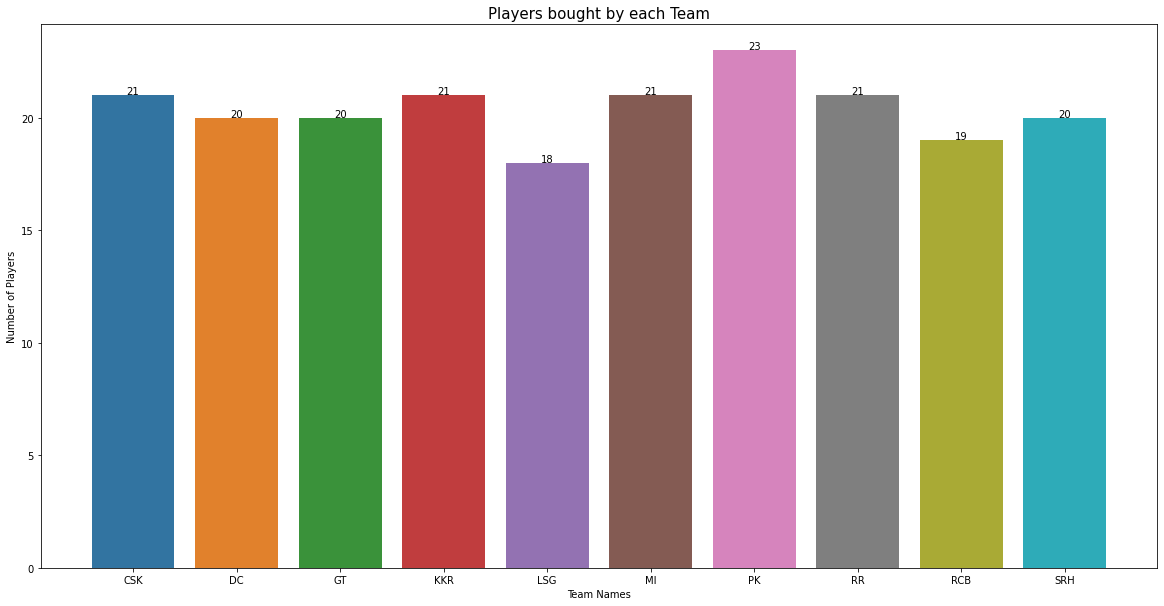

In [26]:
# Total players bought by each team

plt.figure(figsize=(20,10))
fig = sns.countplot(ipl.loc[ipl['Team'] != 'NO TEAM', 'Team'])
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.title('Players bought by each Team', fontsize = 15)
plt.plot()

# function to put label on top of bars

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2, p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0,4), textcoords = 'offset points')

In [27]:
ipl.groupby('Team').size()

Team
CSK         21
DC          20
GT          20
KKR         21
LSG         18
MI          21
NO TEAM    394
PK          23
RCB         19
RR          21
SRH         20
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CSK'),
  Text(1, 0, 'DC'),
  Text(2, 0, 'GT'),
  Text(3, 0, 'KKR'),
  Text(4, 0, 'LSG'),
  Text(5, 0, 'MI'),
  Text(6, 0, 'PK'),
  Text(7, 0, 'RR'),
  Text(8, 0, 'RCB'),
  Text(9, 0, 'SRH')])

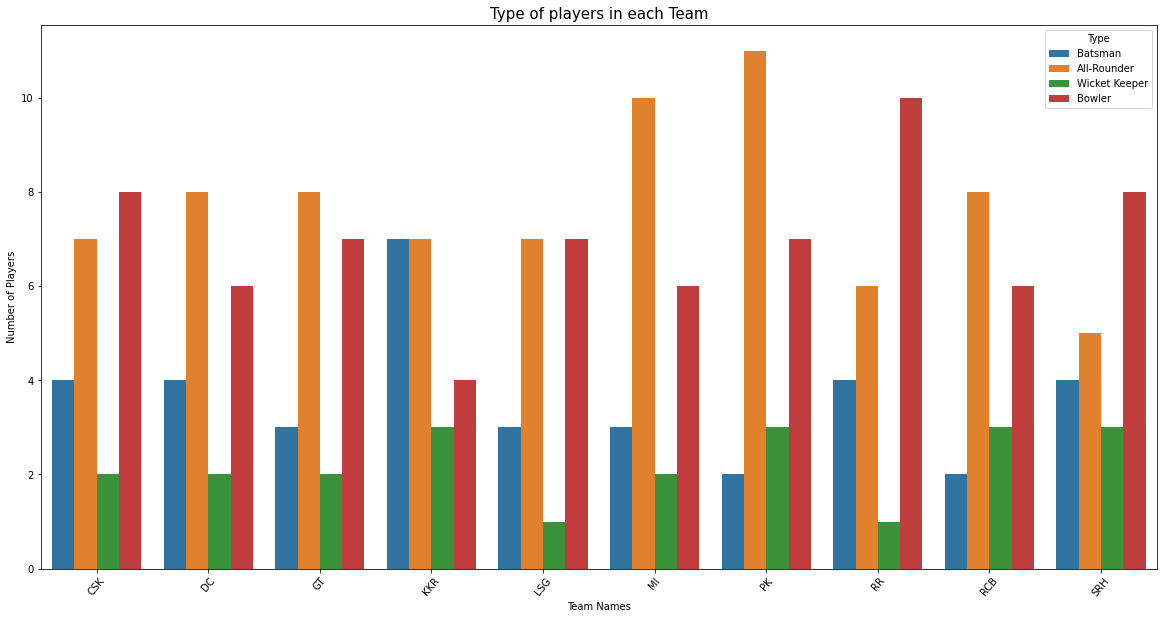

In [28]:
# Types of players in each team

plt.figure(figsize=(20,10))
fig = sns.countplot(ipl.loc[ipl['Team'] != 'NO TEAM', 'Team'], hue = ipl['Type'])
plt.xlabel('Team Names')
plt.ylabel('Number of Players')
plt.title('Type of players in each Team', fontsize = 15)
# plt.plot()
plt.xticks(rotation = 50)

In [29]:
# highest amount spent on a player by each team

max_amt_per_team = ipl.loc[ipl['Team'] != 'NO TEAM'].groupby('Team', as_index = False)['Total Price'].max().sort_values(by = 'Total Price', ascending = False)

Text(0, 0.5, 'Max Amount')

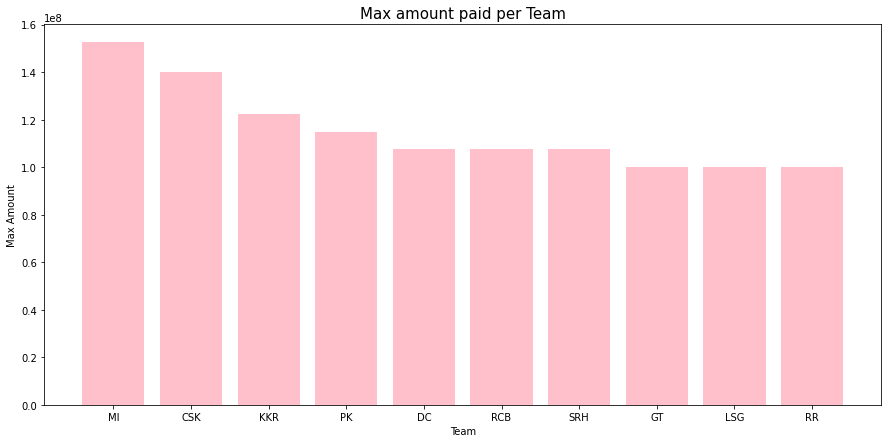

In [30]:
plt.figure(figsize=(15,7))
plt.bar(max_amt_per_team['Team'], max_amt_per_team['Total Price'], color = 'Pink')
plt.title('Max amount paid per Team', fontsize = 15)
plt.xlabel('Team')
plt.ylabel('Max Amount')

In [31]:
# Top bowlers

top_bowlers = ipl.loc[(ipl['Team'] != 'NO TEAM') & (ipl['Type'] == 'Bowler')].sort_values('Total Price', ascending = False).head(5)
top_bowlers[['Players', 'Type', 'Price Paid', 'Team']]

,Players,Type,Price Paid,Team
3,Deepak Chahar,Bowler,"₹14,00,00,000",CSK
24,Shardul Thakur,Bowler,"₹10,75,00,000",DC
148,Prasidh Krishna,Bowler,"₹10,00,00,000",RR
88,Avesh Khan,Bowler,"₹10,00,00,000",LSG
46,Lockie Ferguson,Bowler,"₹10,00,00,000",GT


Text(0, 0.5, 'Amount')

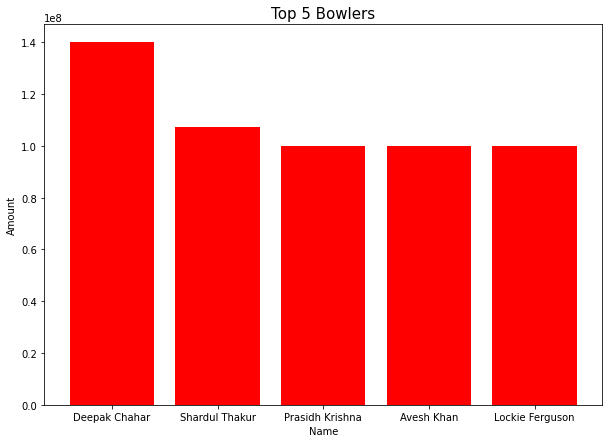

In [32]:
plt.figure(figsize=(10,7))
plt.bar(top_bowlers['Players'], top_bowlers['Total Price'], color = 'Red')
plt.title('Top 5 Bowlers', fontsize = 15)
plt.xlabel('Name')
plt.ylabel('Amount')

In [33]:
# Top batters

top_batters = ipl.loc[(ipl['Team'] != 'NO TEAM') & (ipl['Type'] == 'Batsman')].sort_values('Total Price', ascending = False).head(5)
top_batters[['Players', 'Type', 'Price Paid', 'Team']]

,Players,Type,Price Paid,Team
62,Shreyas Iyer,Batsman,"₹12,25,00,000",KKR
189,Rahul Tripathi,Batsman,"₹8,50,00,000",SRH
146,Shimron Hetmyer,Batsman,"₹8,50,00,000",RR
121,Shikhar Dhawan,Batsman,"₹8,25,00,000",PK
147,Devdutt Padikkal,Batsman,"₹7,75,00,000",RR


Text(0, 0.5, 'Amount')

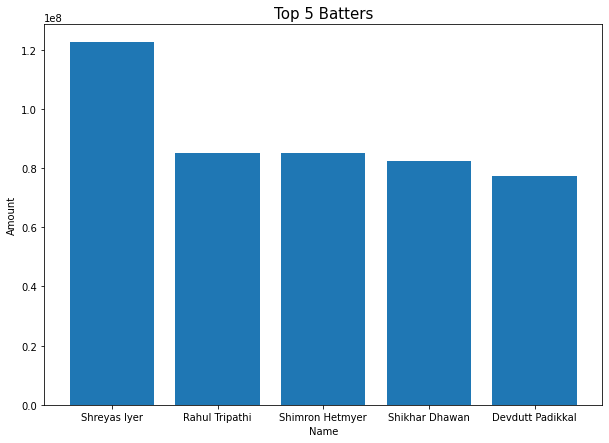

In [34]:
plt.figure(figsize=(10,7))
plt.bar(top_batters['Players'], top_batters['Total Price'])
plt.title('Top 5 Batters', fontsize = 15)
plt.xlabel('Name')
plt.ylabel('Amount')

In [35]:
# Top all rounders

top_all_rounders = ipl.loc[(ipl['Team'] != 'NO TEAM') & (ipl['Type'] == 'All-Rounder')].sort_values('Total Price', ascending = False).head(5)
top_all_rounders[['Players', 'Type', 'Price Paid', 'Team']]

,Players,Type,Price Paid,Team
130,Liam Livingstone,All-Rounder,"₹11,50,00,000",PK
166,Wanindu Hasaranga,All-Rounder,"₹10,75,00,000",RCB
167,Harshal Patel,All-Rounder,"₹10,75,00,000",RCB
48,Rahul Tewatia,All-Rounder,"₹9,00,00,000",GT
126,Shahrukh Khan,All-Rounder,"₹9,00,00,000",PK


Text(0, 0.5, 'Amount')

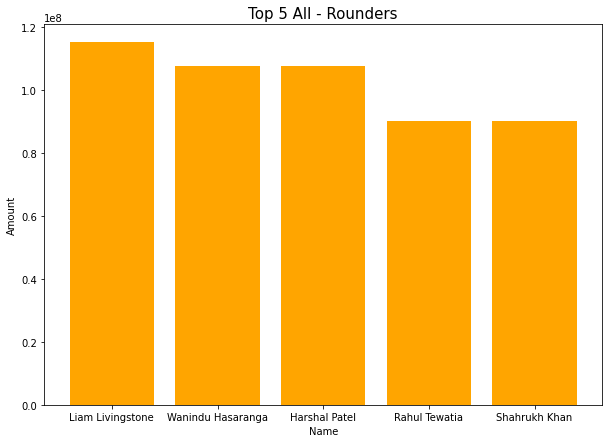

In [36]:
plt.figure(figsize=(10,7))
plt.bar(top_all_rounders['Players'], top_all_rounders['Total Price'], color = 'Orange')
plt.title('Top 5 All - Rounders', fontsize = 15)
plt.xlabel('Name')
plt.ylabel('Amount')

In [37]:
# Top wicket keepers

top_wicket_keepers = ipl.loc[(ipl['Team'] != 'NO TEAM') & (ipl['Type'] == 'Wicket Keeper')].sort_values('Total Price', ascending = False).head(5)
top_wicket_keepers[['Players', 'Type', 'Price Paid', 'Team']]

,Players,Type,Price Paid,Team
100,Ishan Kishan,Wicket Keeper,"₹15,25,00,000",MI
185,Nicholas Pooran,Wicket Keeper,"₹10,75,00,000",SRH
2,Ambati Rayudu,Wicket Keeper,"₹6,75,00,000",CSK
123,Jonny Bairstow,Wicket Keeper,"₹6,75,00,000",PK
82,Quinton De Kock,Wicket Keeper,"₹6,75,00,000",LSG


Text(0, 0.5, 'Amount')

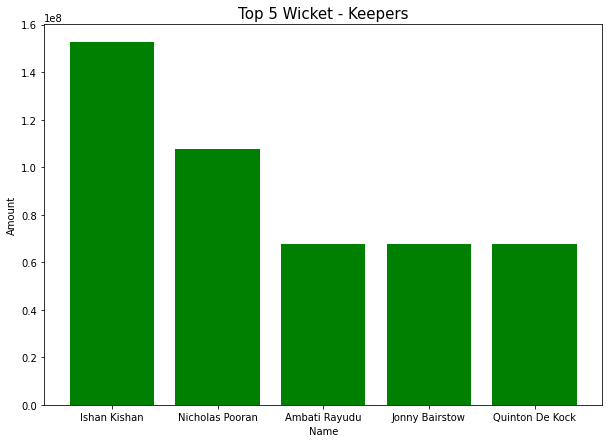

In [38]:
plt.figure(figsize=(10,7))
plt.bar(top_wicket_keepers['Players'], top_wicket_keepers['Total Price'], color = 'Green')
plt.title('Top 5 Wicket - Keepers', fontsize = 15)
plt.xlabel('Name')
plt.ylabel('Amount')

In [39]:
# Top indian players

top_indians = ipl.loc[(ipl['Team'] != 'NO TEAM') & (ipl['Nationality'] == 'Indian')].sort_values('Total Price', ascending = False).head(10)
top_indians[['Players', 'Type', 'Price Paid', 'Team']]

,Players,Type,Price Paid,Team
100,Ishan Kishan,Wicket Keeper,"₹15,25,00,000",MI
3,Deepak Chahar,Bowler,"₹14,00,00,000",CSK
62,Shreyas Iyer,Batsman,"₹12,25,00,000",KKR
24,Shardul Thakur,Bowler,"₹10,75,00,000",DC
167,Harshal Patel,All-Rounder,"₹10,75,00,000",RCB
88,Avesh Khan,Bowler,"₹10,00,00,000",LSG
148,Prasidh Krishna,Bowler,"₹10,00,00,000",RR
48,Rahul Tewatia,All-Rounder,"₹9,00,00,000",GT
126,Shahrukh Khan,All-Rounder,"₹9,00,00,000",PK
184,Washington Sundar,All-Rounder,"₹8,75,00,000",SRH


Text(0, 0.5, 'Amount')

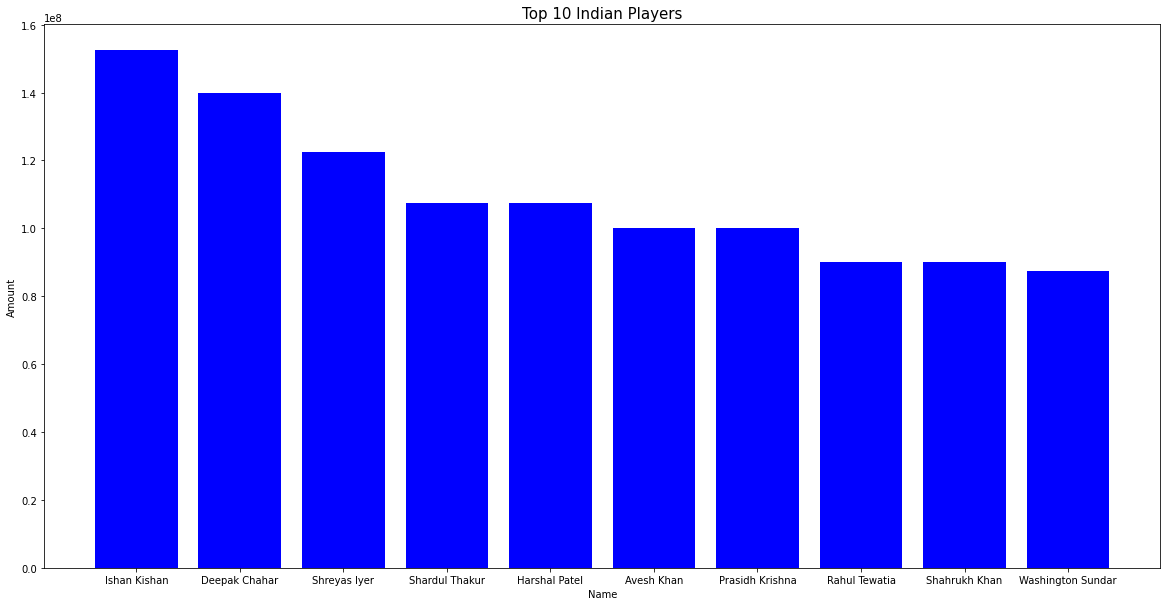

In [40]:
plt.figure(figsize=(20,10))
plt.bar(top_indians['Players'], top_indians['Total Price'], color = 'blue')
plt.title('Top 10 Indian Players', fontsize = 15)
plt.xlabel('Name')
plt.ylabel('Amount')

In [41]:
# Top overseas players

top_overseas = ipl.loc[(ipl['Team'] != 'NO TEAM') & (ipl['Nationality'] == 'Overseas')].sort_values('Total Price', ascending = False).head(10)
top_overseas[['Players', 'Type', 'Price Paid', 'Team']]

,Players,Type,Price Paid,Team
130,Liam Livingstone,All-Rounder,"₹11,50,00,000",PK
185,Nicholas Pooran,Wicket Keeper,"₹10,75,00,000",SRH
166,Wanindu Hasaranga,All-Rounder,"₹10,75,00,000",RCB
46,Lockie Ferguson,Bowler,"₹10,00,00,000",GT
122,Kagiso Rabada,Bowler,"₹9,25,00,000",PK
84,Jason Holder,All-Rounder,"₹8,75,00,000",LSG
146,Shimron Hetmyer,Batsman,"₹8,50,00,000",RR
112,Tim David,All-Rounder,"₹8,25,00,000",MI
109,Jofra Archer,All-Rounder,"₹8,00,00,000",MI
145,Trent Boult,Bowler,"₹8,00,00,000",RR


Text(0, 0.5, 'Amount')

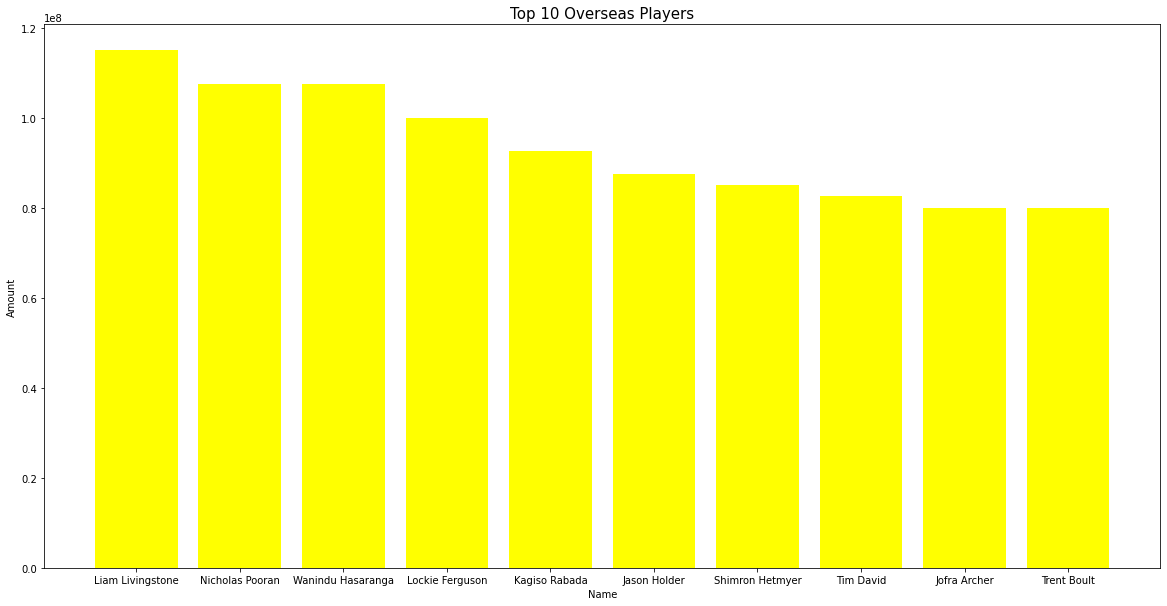

In [42]:
plt.figure(figsize=(20,10))
plt.bar(top_overseas['Players'], top_overseas['Total Price'], color = 'Yellow')
plt.title('Top 10 Overseas Players', fontsize = 15)
plt.xlabel('Name')
plt.ylabel('Amount')